# Задача 5 - 6. Объединенная задача. Есть шахматное поле 8*8, есть черная фигура, есть фигура белых (ферзь или конь). Задается начальное положение. И нужно опередлить угрожает ли белая фигура черной при учете что у белых есть еще ход (т.е есть или угроза сразу или через ход)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML

def draw_chessboard(position=None):
    """Функция отрисовки шахматной доски."""
    
    board = np.zeros((8, 8))
    for x in range(8):
        for y in range(8):
            board[x, y] = (x + y) % 2  # Черно-белая раскраска
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(board, cmap="gray", interpolation="nearest")
    
    # Отображение фигур

    if position:
        for (x, y, piece) in position:
            ax.text(x, y, piece, ha="center", va="center", fontsize=20, color="red")  # x и y инвертированы

    # Подписи к осям
    ax.set_xticks(range(8))
    ax.set_yticks(range(8))
    
    # Подписи для оси X (столбцы a-h)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
    
    # Подписи для оси Y (строки 1-8 снизу вверх)
    ax.set_yticklabels([8, 7, 6, 5, 4, 3, 2, 1])
    
    plt.grid(True)
    plt.show()

In [2]:
def is_valid_move(x, y, size=8):
    """Функция проверки, находится ли клетка (x, y) в пределах доски размера size x size.
    Параметры: 
    x, y координаты клетки
    size - размерность доски (для шахмат 8)
    """
    return 0 <= x < size and 0 <= y < size

In [3]:
def chess_notation_to_index(notation):
    """
    Преобразует шахматную нотацию (например, 'a1', 'e6') в индексы.
    
    Пример: 'e6' -> (4, 5)
    """
    # Словарь для перевода букв (a-h) в индексы (0-7)
    letter_to_index = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
    
    letter = notation[0].lower()  # Берем первую букву и приводим к нижнему регистру
    number = int(notation[1])   # Преобразуем число в индекс, но без сдвига

    # Преобразуем строку (например, 1 -> 7, 2 -> 6, ... 8 -> 0)
    return (letter_to_index[letter], 8 - number)  # Инвертируем строку

In [4]:
def check_check(move_list, x_black, y_black):
    """
    Проверяет, находится ли король под шахом.
    Параметры:
    move_list - список потенциальных клеток для удара (может содержать кортежи или списки).
    x_black, y_black - координаты черного короля.
    
    Возвращает:
    True/False в зависимости от того, находится ли король под шахом.
    """
    # Преобразуем каждый элемент move_list в кортеж, если это список
    normalized_moves = [tuple(move) if isinstance(move, list) else move for move in move_list]
    return (x_black, y_black) in normalized_moves

In [5]:
def knight_move(x_white, y_white):
    """
    Функция формирования списка клеток, куда может попасть конь.
    Параметры: 
    x_white, y_white - стартовые координаты коня.
    Возвращает:
    new_knight_moves - список клеток, куда может пойти конь.
    """
    knight_moves = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    
    new_knight_moves = []

    for dx, dy in knight_moves: 
        new_x, new_y = x_white + dx, y_white + dy  
        if is_valid_move(new_x, new_y):  # Проверка границ
            new_knight_moves.append([new_x, new_y])  
    return new_knight_moves

In [6]:
def check_next_move(new_knight_moves, x_black, y_black):
    """
    Функция для проверки возможности шаха на следующем ходу.
    Параметры:
    new_knight_moves - список возможных ходов для коня.
    x_black, y_black - координаты черного короля.
    """
    count_check = 0
    for item in new_knight_moves:
        knight_moves = knight_move(item[0], item[1])
        if check_check(knight_moves, x_black, y_black):  # Проверяем, не попадет ли ход в шах
            count_check += 1
    if count_check > 0:
        display(HTML("<p style='color:red;'>В результате хода возможен шах черному королю</p>"))
    else:
        display(HTML("<p style='color:green;'>Нет шаха черному королю после следующего хода коня</p>"))



In [7]:
def next_move(new_knight_moves):

    """
    Функция для расчета следующего хода.
    Параметры:
    new_knight_moves - список возможных ходов для коня.
    Возвращает:
    x_white, y_white новые координаты фигуры
    """

    input_white_coord = input("Введите координаты хода белого коня (например, e4 или A1): ")
    x_white, y_white = chess_notation_to_index(input_white_coord)
    

    # Проверка на корректность хода
    while [x_white, y_white] not in new_knight_moves:
        print('Так конь не ходит. Попробуйте снова.')
        input_white_coord = input("Введите координаты хода белого коня (например, e4 или A1): ")
        x_white, y_white = chess_notation_to_index(input_white_coord)

    return x_white, y_white
    

In [8]:
def start_initialization(selected_figure):

    """
    Функция для инициализации фигур.
    Параметры:
    selected_figure - выбранная фигура
    Возвращает:
    x_white, y_white, x_black, y_black координаты фигур
    """

    x_white = x_black = 0
    y_white = y_black = 1  # Пример начальных позиций

    if selected_figure == "конь":
        selected_figure = "коня"
    else:
        selected_figure = "ферзя"

    while x_white == x_black and y_white == y_black:
        input_black_coord = input("Введите положение черного короля (например, e4 или A1): ")
        x_black, y_black = chess_notation_to_index(input_black_coord)

        input_white_coord = input(f"Введите положение белого {selected_figure} (например, e4 или A1): ")
        x_white, y_white = chess_notation_to_index(input_white_coord)
            
    return x_white, y_white, x_black, y_black

In [9]:
def queen_move(x_white, y_white):
    """
    Формирование списка клеток, куда может пойти ферзь.
    
    Параметры:
    x_white, y_white - стартовые координаты ферзя.
    
    Возвращает:
    new_queen_moves - список клеток, куда может пойти ферзь.
    """
    new_queen_moves = []

    # Горизонтальные и вертикальные направления
    for i in range(8):
        if i != y_white:
            new_queen_moves.append((x_white, i))  # Горизонтальные ходы
    
        if i != x_white:
            new_queen_moves.append((i, y_white))  # Вертикальные ходы


    # Диагональные направления
    for dx, dy in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
        nx, ny = x_white + dx, y_white + dy
        while 0 <= nx < 8 and 0 <= ny < 8:
            new_queen_moves.append((nx, ny))

            nx += dx
            ny += dy

    return new_queen_moves

In [10]:
def check_next_queen_move(new_queen_moves, x_black, y_black):
    """
    Проверка возможности шаха после хода ферзя.
    
    Параметры:
    new_queen_moves - список возможных ходов для ферзя.
    x_black, y_black - координаты черного короля.
    """
    count_check = 0
    for move in new_queen_moves:
        next_moves = queen_move(move[0], move[1])
        if check_check(next_moves, x_black, y_black):  # Проверяем возможность шаха
            count_check += 1
    if count_check > 0:
        display(HTML("<p style='color:red;'>В результате хода возможен шах черному королю</p>"))
    else:
        display(HTML("<p style='color:green;'>Нет шаха черному королю после следующего хода ферзя</p>"))


In [11]:
def next_queen_move(new_queen_moves):

    """
    Функция для расчета следующего хода.
    Параметры:
    new_queen_moves - список возможных ходов для ферзя.
    Возвращает:
    x_white, y_white новые координаты фигуры
    """

    input_white_coord = input("Введите координаты хода белого ферзя (например, e4 или A1): ")
    x_white, y_white = chess_notation_to_index(input_white_coord)
    

    # Проверка на корректность хода
    while (x_white, y_white) not in new_queen_moves:
        print(f'x_white, y_white {x_white}{y_white}')
        print('Так ферзь не ходит. Попробуйте снова.')
        input_white_coord = input("Введите координаты хода белого ферзя (например, e4 или A1): ")
        x_white, y_white = chess_notation_to_index(input_white_coord)

    return x_white, y_white
    

In [12]:
def chess():
    letter_to_index = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
    
    selected_figure = input("Введите фигуру (конь или ферзь): ").lower()

    while selected_figure != "конь" and selected_figure != "ферзь":
        print('Такой фигуры нет')
        selected_figure = input("Введите фигуру (конь или ферзь): ").lower()

    print(f"Вы выбрали фигуру: {selected_figure}")
    
    # Логика для выбранной фигуры
    if selected_figure.lower() == "конь":
        
        x_white, y_white, x_black, y_black = start_initialization(selected_figure.lower())

        initial_position = [(x_black, y_black, '♚'), (x_white, y_white, '♘')]
        draw_chessboard(initial_position)
        new_knight_moves = knight_move(x_white, y_white)

        print(f'new_knight_moves {new_knight_moves}')

        if check_check(new_knight_moves, x_black, y_black):
            display(HTML("<p style='color:red;'>Объявлен шах черному королю</p>"))
        else:
            check_next_move(new_knight_moves, x_black, y_black)
            input_turn_or_exit = input("Введите 'ход' для продолжения или 'выход' для завершения: ")
            
            while input_turn_or_exit.lower() != 'выход':
                
                x_white, y_white = next_move(new_knight_moves)
                initial_position = [(x_black, y_black, '♚'), (x_white, y_white, '♘')]
                draw_chessboard(initial_position)

                new_knight_moves = knight_move(x_white, y_white)
                
                if check_check(new_knight_moves, x_black, y_black):
                    display(HTML("<p style='color:red;'>Объявлен шах черному королю</p>"))
                input_turn_or_exit = input("Введите 'ход' для продолжения или 'выход' для завершения: ")
                if input_turn_or_exit == 'выход':
                    display(HTML("<p style='color:red;'>Завершаем игру</p>"))
                    break  # Прерывание цикла
                    
    if selected_figure.lower() == "ферзь":

        x_white, y_white, x_black, y_black = start_initialization(selected_figure.lower())

        initial_position = [(x_black, y_black, '♚'), (x_white, y_white, '♕')]
        draw_chessboard(initial_position)

        new_queen_moves = queen_move(x_white, y_white)
        new_queen_moves.sort()

        print(f'new_queen_moves {new_queen_moves}')

        if check_check(new_queen_moves, x_black, y_black):
            display(HTML("<p style='color:red;'>Объявлен шах черному королю</p>"))
        else:

            check_next_queen_move(new_queen_moves, x_black, y_black)
            input_turn_or_exit = input("Введите 'ход' для продолжения или 'выход' для завершения: ")
            
            while input_turn_or_exit.lower() != 'выход':
                
                x_white, y_white = next_queen_move(new_queen_moves)
                initial_position = [(x_black, y_black, '♚'), (x_white, y_white, '♕')]
                draw_chessboard(initial_position)

                new_queen_moves = queen_move(x_white, y_white)
                if check_check(new_queen_moves, x_black, y_black):
                     display(HTML("<p style='color:red;'>Объявлен шах черному королю</p>"))
                input_turn_or_exit = input("Введите 'ход' для продолжения или 'выход' для завершения: ")
                if input_turn_or_exit == 'выход':
                    print("Завершаем игру.")
                    break  # Прерывание цикла

        

Введите фигуру (конь или ферзь):  конь


Вы выбрали фигуру: конь


Введите положение черного короля (например, e4 или A1):  f7
Введите положение белого коня (например, e4 или A1):  c4


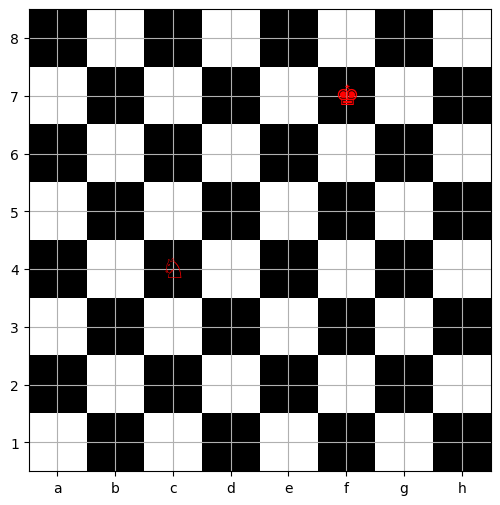

new_knight_moves [[4, 5], [3, 6], [1, 6], [0, 5], [0, 3], [1, 2], [3, 2], [4, 3]]


Введите 'ход' для продолжения или 'выход' для завершения:  d6
Введите координаты хода белого коня (например, e4 или A1):  d6


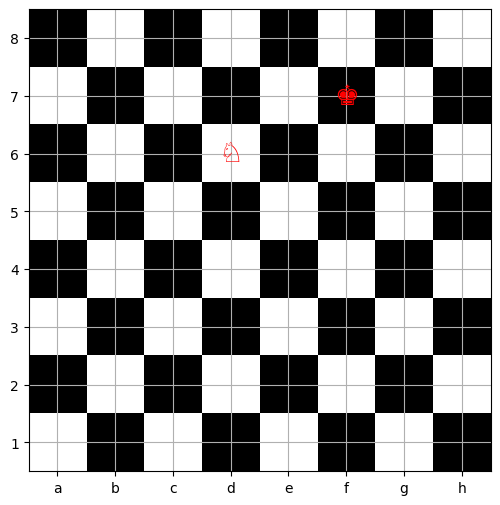

Введите 'ход' для продолжения или 'выход' для завершения:  выход


In [13]:
chess()

Введите фигуру (конь или ферзь):  ферзь


Вы выбрали фигуру: ферзь


Введите положение черного короля (например, e4 или A1):  g8
Введите положение белого ферзя (например, e4 или A1):  b1


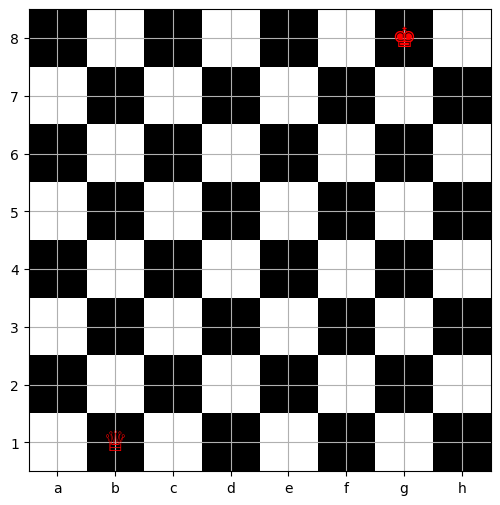

new_queen_moves [(0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7), (3, 5), (3, 7), (4, 4), (4, 7), (5, 3), (5, 7), (6, 2), (6, 7), (7, 1), (7, 7)]


Введите 'ход' для продолжения или 'выход' для завершения:  ход
Введите координаты хода белого ферзя (например, e4 или A1):  g1


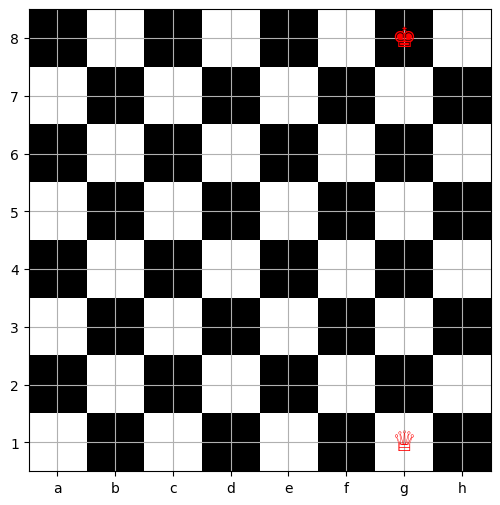

In [ ]:
chess()